<a href="https://colab.research.google.com/github/Tanmay8275987417/Deep-Learning-Iris-Dataset-classification-using-ANN/blob/main/Iris_Dataset_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of IRIS Flower using Artifical Neural Network**

In [1]:
# Import packages

import numpy as np    # For Operations
import pandas as pd   # For Data Import
import keras
from keras.models import Sequential   # Imported Sequencial Model
from keras.layers import Dense    # For Layers
from keras.optimizers import Adam   # For Optimizers
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import seaborn as sns

import matplotlib.pyplot as plt

# Information about Data

The Iris dataset has 150 observations or Rows and 5 atttibutes or Columns of Iris Flowers.

First four columns are - **Sepal Length, Sepal Width , Petal Length, Petal Width**, all are in cm.


---


The Last column is containing the Classes - **['setosa' 'versicolor' 'virginica']**


---



**Classes are - [ 0 , 1 , 2 ] instead of ['setosa' 'versicolor' 'virginica'].**

In [2]:
# Import dataset on Google Colab

from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['iris.data']))
# Dataset is now stored in a Pandas Dataframe

Saving iris.data to iris.data


In [4]:
print(data)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


## Data Preprossing

In data preprossing, I have detected the missing values in data set 

In [5]:
pd.isna(data)

,5.1,3.5,1.4,0.2,Iris-setosa
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


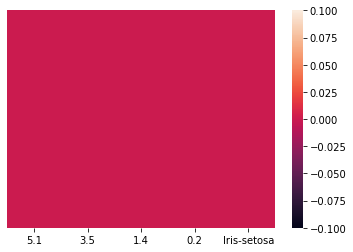

In [6]:
sns.heatmap(data.isnull(), yticklabels=False) #cbar=False,cmap='viridis')  # Heatmap is showing us that there is no missing values in the dataset  

It seems that there are no missing data, hence the data is ready to proccede further for selecting the independent and Dependent variables.

In [7]:
X = data.iloc[:,0:4].values # Selecting Features
y = data.iloc[:,4].values   # Target Variable

# Transforming the Target varible by using Label Encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

# Spliting the dataset 70% Training data and 30% Testing data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [8]:
y1    # Encoded y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Implementing the Artificial Neural Network for classification of IRIS Flower

Here I have created the ANN model to classify th IRIS flower in encoded form **0 - Setosa, 1- Versicolor and 2 -Virginica**.

By using 2 hidden layers with **relu activation function**, followed by **Softmax activation function** in the Output layer

In [13]:
# Building the Model

model = Sequential(name="my_sequential")

model.add(Dense(50,input_shape=(4,), activation='relu', name="layer1"))   # Input(4) Layer and First hidden layer with 10 Nurons using relu activation function

model.add(Dense(50, activation='relu',name="layer2")) # Second hidden layer with 50 Nurons using relu activation function

model.add(Dense(3, activation='softmax', name="layer3")) # Output(3) Layer with Softmax Activation function



In [14]:
model.summary()

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 50)                250       
_________________________________________________________________
layer2 (Dense)               (None, 50)                2550      
_________________________________________________________________
layer3 (Dense)               (None, 3)                 153       
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the Model
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])    #

In [16]:
# Fit the Model
model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 1.4413 - accuracy: 0.3286
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.1008 - accuracy: 0.1582
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9748 - accuracy: 0.4534
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8766 - accuracy: 0.6480
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.6486
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7269
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6901
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.8295
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.6790
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7689
Epoch 11/

In [17]:
# Predicting the results
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2,
       2])

In [18]:
# Confusion matrix for finding out the accuracy, f1-score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        16
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 16  0]
 [ 0  1 12]]


In [19]:
(16+16+12)/45


0.9777777777777777

In [20]:
# Evaluate the Model
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0574 - accuracy: 0.9778


[0.05739866942167282, 0.9777777791023254]

In [21]:
# Predict for the first 10 Observations
pred=model.predict(X_test[:10])
print(pred)

[[7.6210704e-06 5.4175343e-02 9.4581699e-01]
 [6.8392255e-05 2.5788179e-01 7.4204981e-01]
 [1.9539075e-03 9.8843026e-01 9.6158609e-03]
 [2.0074539e-03 9.9678111e-01 1.2113876e-03]
 [9.9703920e-01 2.9608817e-03 2.6839201e-08]
 [4.4123208e-08 2.0050635e-03 9.9799490e-01]
 [1.4532479e-05 8.4927283e-02 9.1505814e-01]
 [1.2399117e-03 9.9250424e-01 6.2557994e-03]
 [1.7889100e-05 8.2449295e-02 9.1753280e-01]
 [1.2203994e-03 9.8887676e-01 9.9027818e-03]]


In [22]:
# Comparing the predicted class with the actual Class
p=np.argmax(pred, axis=1)
print(p)
print(y_pred_class[:10])

[2 2 1 1 0 2 2 1 2 1]
[2 2 1 1 0 2 2 1 2 1]
